<a href="https://colab.research.google.com/github/jhonson-tg/Classification-models/blob/main/notebook2400bfcd20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [4]:
# Read the data
df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.shape

(1470, 35)

In [10]:
# Unique values in each columns
for col in df.columns:
  print(f"{col}: number of unique values is {df[col].nunique()}")
  print("-------------------------------------------\n")

Age: number of unique values is 43
-------------------------------------------

Attrition: number of unique values is 2
-------------------------------------------

BusinessTravel: number of unique values is 3
-------------------------------------------

DailyRate: number of unique values is 886
-------------------------------------------

Department: number of unique values is 3
-------------------------------------------

DistanceFromHome: number of unique values is 29
-------------------------------------------

Education: number of unique values is 5
-------------------------------------------

EducationField: number of unique values is 6
-------------------------------------------

EmployeeCount: number of unique values is 1
-------------------------------------------

EmployeeNumber: number of unique values is 1470
-------------------------------------------

EnvironmentSatisfaction: number of unique values is 4
-------------------------------------------

Gender: number of uniqu

In [11]:
# Drop the columns which are not relavant or most probably won't contribute to the model prediction
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace=True, axis="columns")

# Categorical Features

In [12]:
# Print unique values present in categorical features and it's count
for col in df.columns:
  if df[col].dtype == "object" and len(df[col].unique()) <= 30:
    print(f"{col}: Unique values present are: {df[col].unique()}")
    print(df[col].value_counts())
    print("========================================================")

Attrition: Unique values present are: ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel: Unique values present are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department: Unique values present are: ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField: Unique values present are: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender: Unique values present are: ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole: Unique values present are: ['Sales Executive' 'Res

In [13]:
# Using Label encoder on Attrition
label = LabelEncoder()
df['Attrition'] = label.fit_transform(df.Attrition)

In [14]:
cat_features = [col for col in df.columns if df[col].dtype == "object"]

In [15]:
cat_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

# Numerical Features

In [16]:
for col in df.columns:
  if df[col].dtype != "object" and len(df[col].unique()) <= 30:
    print(f"{col}: unique values: {df[col].unique()}")
    print("-----------------------------------------------")

Attrition: unique values: [1 0]
-----------------------------------------------
DistanceFromHome: unique values: [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
-----------------------------------------------
Education: unique values: [2 1 4 3 5]
-----------------------------------------------
EnvironmentSatisfaction: unique values: [2 3 4 1]
-----------------------------------------------
JobInvolvement: unique values: [3 2 4 1]
-----------------------------------------------
JobLevel: unique values: [2 1 3 4 5]
-----------------------------------------------
JobSatisfaction: unique values: [4 2 3 1]
-----------------------------------------------
NumCompaniesWorked: unique values: [8 1 6 9 0 4 5 2 7 3]
-----------------------------------------------
PercentSalaryHike: unique values: [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
-----------------------------------------------
PerformanceRating: unique values: [3 4]
---------------------------

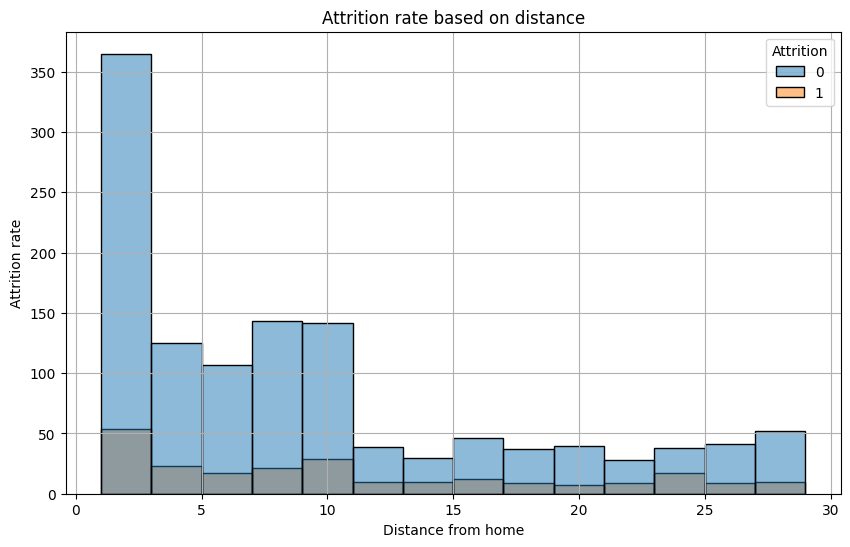

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='DistanceFromHome', hue='Attrition')
plt.title('Attrition rate based on distance')
plt.xlabel('Distance from home')
plt.ylabel('Attrition rate')
plt.grid(True)
plt.show()

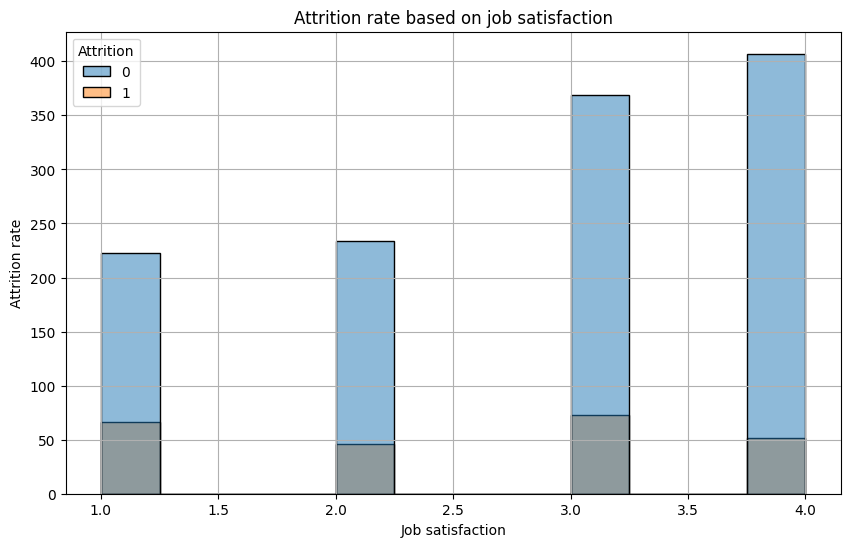

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.title('Attrition rate based on job satisfaction')
plt.xlabel('Job satisfaction')
plt.ylabel('Attrition rate')
plt.grid(True)
plt.show()

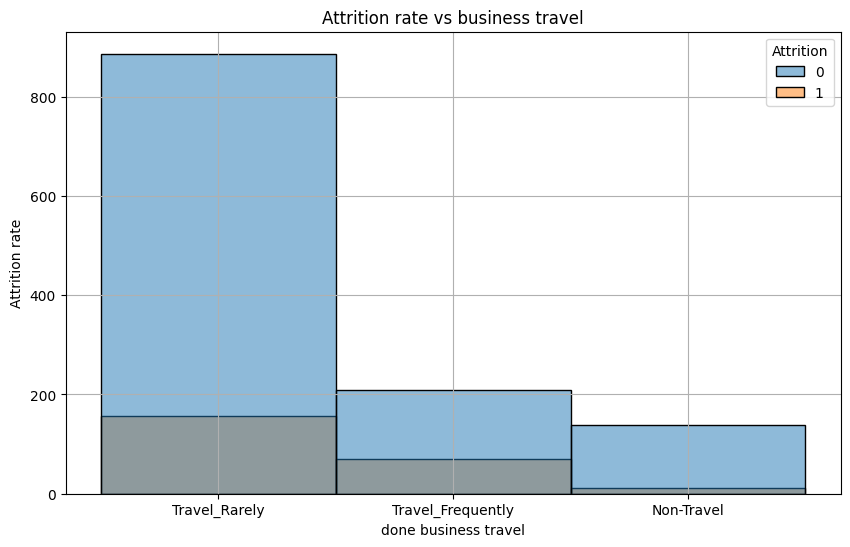

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BusinessTravel', hue='Attrition')
plt.title('Attrition rate vs business travel')
plt.xlabel('done business travel')
plt.ylabel('Attrition rate')
plt.grid(True)
plt.show()

<ipython-input-20-ee3568491009>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, annot_kws={"size":15}, fmt=".2f")


<Axes: >

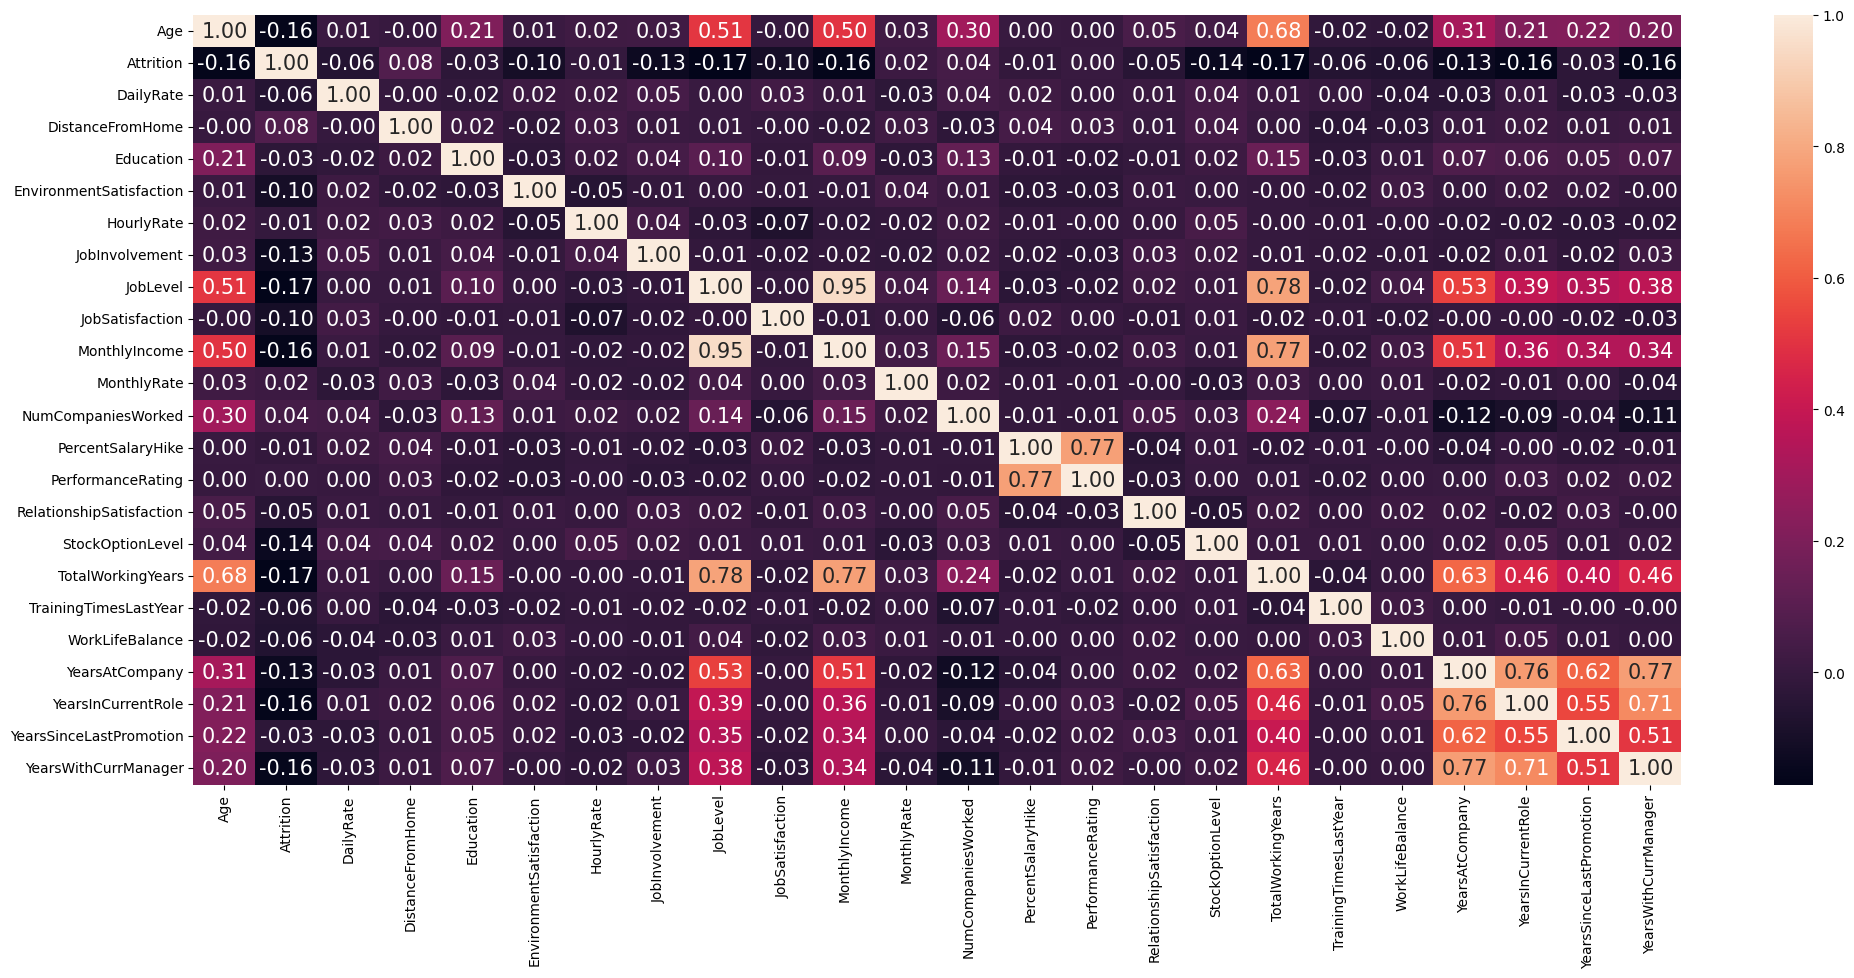

In [20]:
plt.figure(figsize=(24, 10))
sns.heatmap(df.corr(), annot=True, annot_kws={"size":15}, fmt=".2f")

<ipython-input-21-658145482e8e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(), dtype=bool)
<ipython-input-21-658145482e8e>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, cmap=cmap, fmt='.2f', annot=True);


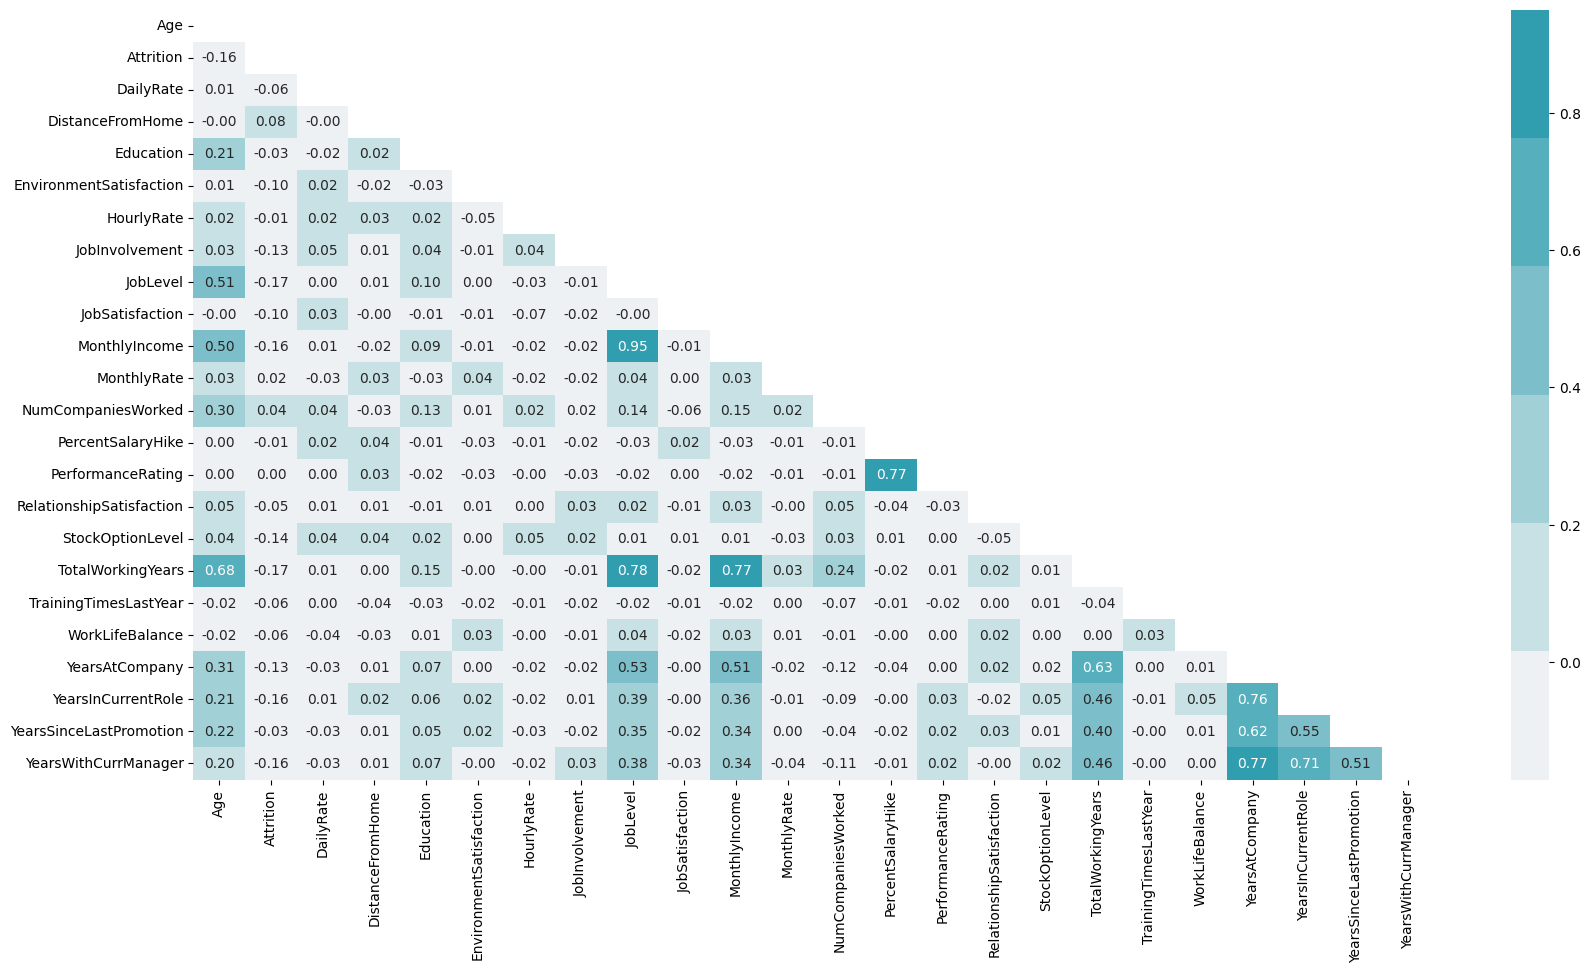

In [21]:
plt.figure(figsize=(20, 10))
# Maks the upper triangle
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.light_palette((210, 90, 60), input='husl')
sns.heatmap(df.corr(), mask=mask, cmap=cmap, fmt='.2f', annot=True);

# Data Preprocessing

In [25]:
# Transform categorical data into dummies
dummy_col = [column for column in df.drop('Attrition', axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [27]:
print(data.shape)

(1470, 136)


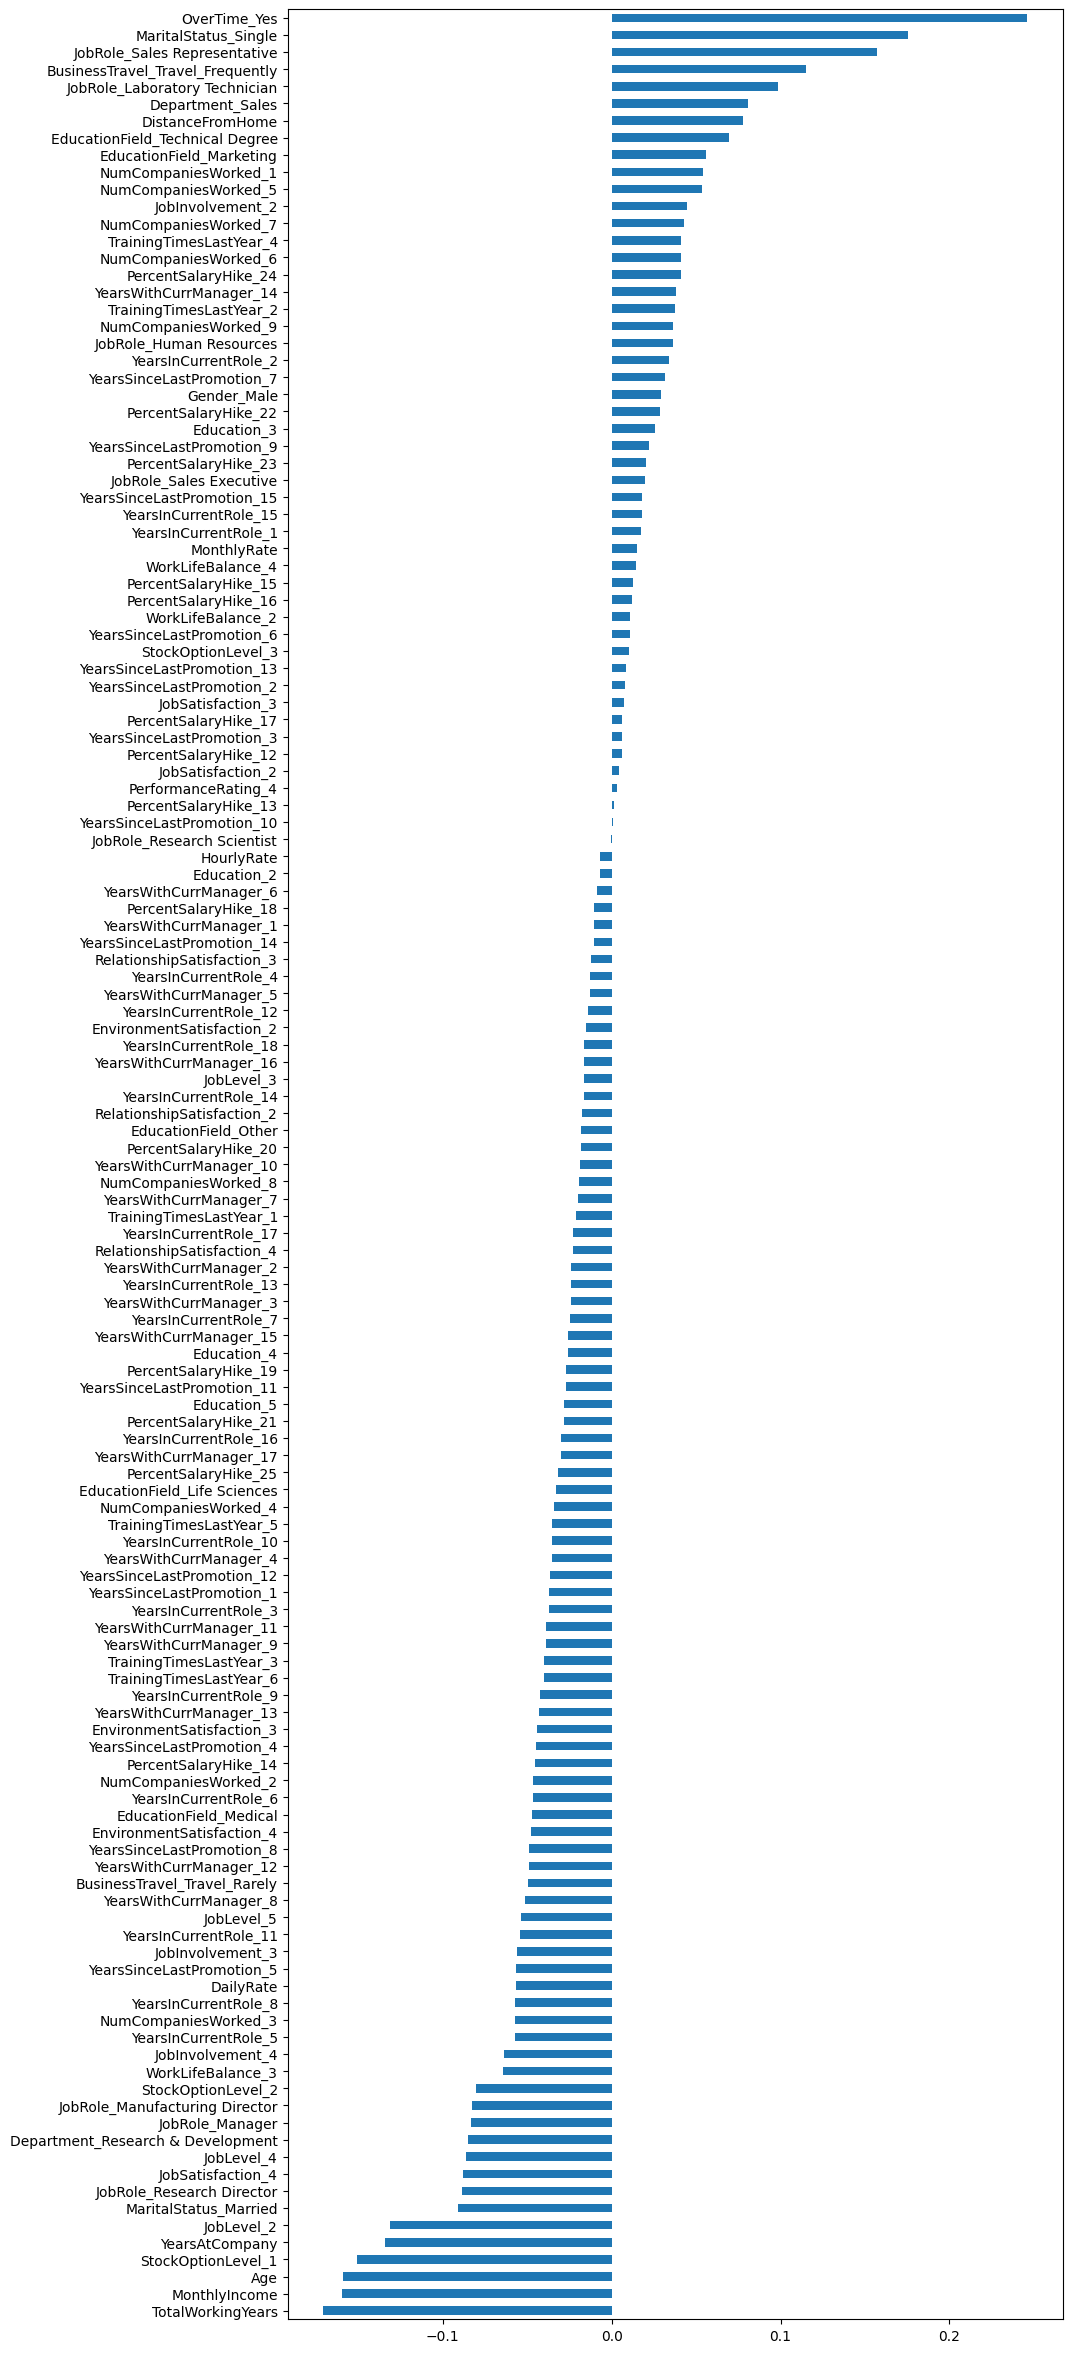

In [28]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30));

In [31]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index

# Applying Machine learning Algo

In [36]:
X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
X_std = scaler.fit_transform(X)

In [37]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

# What defines the success
> We have an imbalanced data, so if we predict that all our employees will stay we'll have an accuracy of 84.01%.

In [40]:
y_test.value_counts()[0] / y_test.shape[0]

0.8401360544217688

In [41]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 83.84%
Leaving Rate: 16.16%
===============TEST=================
Staying Rate: 84.01%
Leaving Rate: 15.99%


In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# ⚓ Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')

lr_clf.fit(X_train_std, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[352 634]
 [ 46 144]]
ACCURACY SCORE:
0.4218
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.88   0.19      0.42       0.53          0.77
recall      0.36   0.76      0.42       0.56          0.42
f1-score    0.51   0.30      0.42       0.40          0.47
support   986.00 190.00      0.42    1176.00       1176.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 76 171]
 [ 12  35]]
ACCURACY SCORE:
0.3776
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.86  0.17      0.38       0.52          0.75
recall      0.31  0.74      0.38       0.53          0.38
f1-score    0.45  0.28      0.38       0.37          0.43
support   247.00 47.00      0.38     294.00        294.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


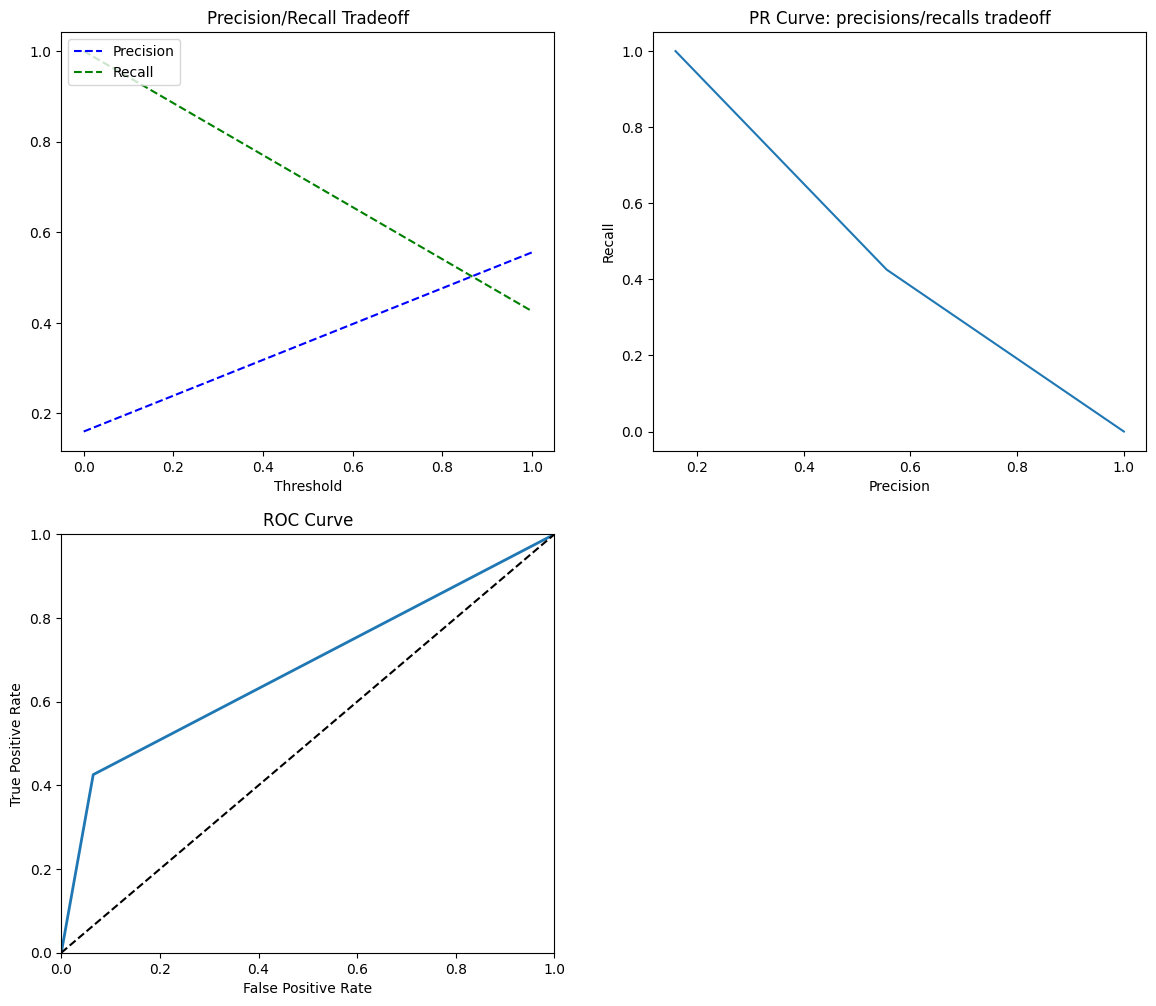

In [45]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test_std))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test_std))
plot_roc_curve(fpr, tpr)

In [46]:
scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, lr_clf.predict(X_test)),
    },
}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [47]:
scores_dict

{'Logistic Regression': {'Train': 0.5574463542222697,
  'Test': 0.5261865793780687}}